<a href="https://colab.research.google.com/github/MMoltira/DataMining/blob/master/Project30/11/2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
path = '/content/drive/My Drive/DWDM_material'

In [187]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
avg_Debt_1 = os.path.join(path,'avg_Debt_1.csv')

In [6]:
avg_Debt_1 = pd.read_csv(avg_Debt_1)
avg_Debt_1

,จังหวัด,avg_debt
0,กรุงเทพมหานคร 53,207665.0
1,สมุทรปราการ 53,117360.8
2,นนทบุรี 53,240769.0
3,ปทุมธานี 53,220761.2
4,พระนครศรีอยุธยา 53,163424.5
...,...,...
226,ตรัง 55,160207.0
227,พัทลุง 55,162248.7
228,ปัตตานี 55,109102.5
229,ยะลา 55,35828.9


In [7]:
avg_Debt_1.shape

(231, 2)

In [8]:
avg_Debt_1.isnull().any()

จังหวัด     False
avg_debt     True
dtype: bool

In [9]:
avg_Debt_1[['avg_debt']] = avg_Debt_1[['avg_debt']].fillna(0) 

In [10]:
avg_Debt_1.isnull().any()

จังหวัด     False
avg_debt    False
dtype: bool

In [11]:
avg_Debt_1 = avg_Debt_1.sort_values('avg_debt')

In [12]:
avg_Debt_1

,จังหวัด,avg_debt
128,บึงกาฬ 54,0.0
51,บึงกาฬ 53,0.0
100,สมุทรสงคราม 54,9244.0
177,สมุทรสงคราม 55,9857.2
75,ยะลา 53,18901.5
...,...,...
156,นนทบุรี 55,260752.2
162,ชัยนาท 55,264144.0
154,กรุงเทพมหานคร 55,275576.8
5,อ่างทอง 53,309493.7


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [138]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.4
numpy   version = 1.18.5
seaborn version = 0.11.0


In [139]:
from sklearn.cluster import KMeans

In [140]:
X = avg_Debt_1[['avg_debt']]
# X = df[[''avg_debt 53',	'avg_debt 54',	'avg_debt 55'']]

In [141]:
from sklearn.datasets import make_blobs

In [198]:
Xmean=make_blobs(n_samples=231, centers=3, n_features=2, random_state=6)

In [199]:
X.shape 

(231, 2)

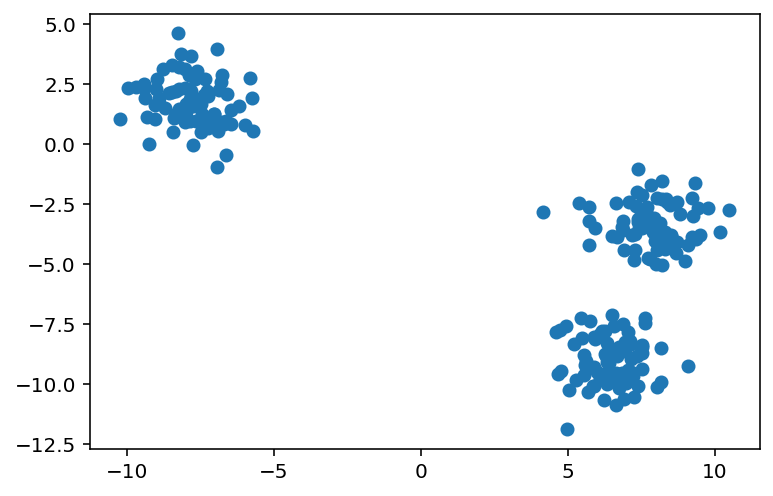

In [200]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [201]:
from sklearn.cluster import KMeans

In [202]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [203]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [204]:
label=KMclust.predict(X) # predict ว่าอยู่ในกลุ่มไหน

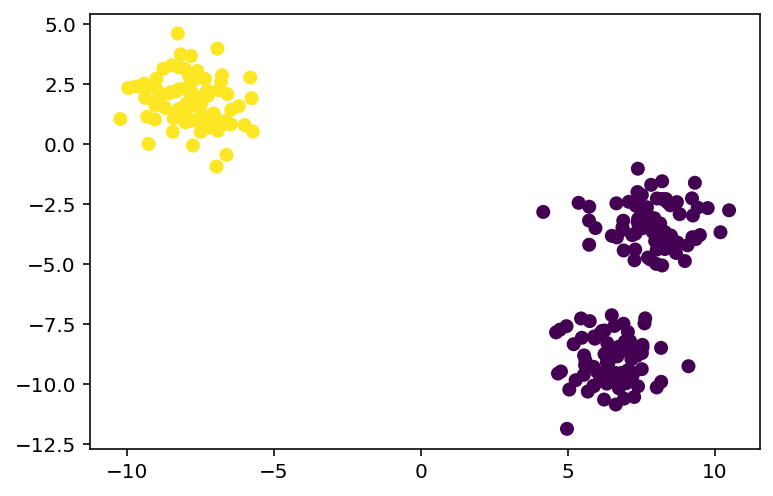

In [205]:
plt.scatter(X[:,0], X[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [267]:
n_krachuk = 2 # จำนวนกระจุก
n_thamsam = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueak = np.random.choice(len(X),n_krachuk,replace=0)
X_cen = X[sumlueak] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsam):
    raya2 = ((X_cen[None]-X[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klum = raya2.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_mai = np.empty_like(X_cen) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuk):
        if(len(X[klum==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_mai[j] = X[klum==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_mai[j] = X[np.random.randint(len(X))]
    if(np.allclose(X_cen,X_cen_mai,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cen = X_cen_mai
        break
    X_cen = X_cen_mai # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

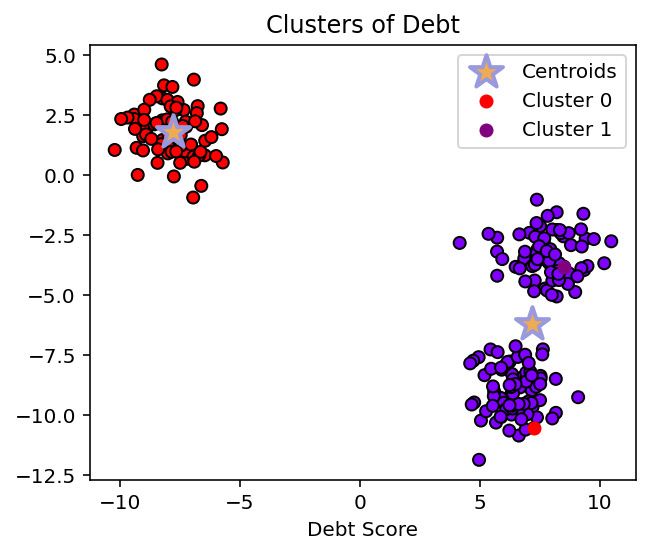

In [308]:
raya2 = ((X_cen[None]-X[:,None])**2).sum(2)
z = raya2.argmin(1)
plt.gca(aspect=1)
plt.scatter(X[:,0],X[:,1],c=z,edgecolor='k',cmap='rainbow')
plt.scatter(X_cen[:,0],X_cen[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(X[0,0], X[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(X[1,0], X[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Debt')
plt.xlabel('Debt Score')
plt.legend()
plt.show()

In [275]:
sse = 0
for i in range(n_krachuk):
    sse += np.sum(raya2[z==i,i])
print(sse)

1751.9669425508212


In [212]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [213]:
KMclust.transform(X) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [215]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.8832597611778],
 [5, 327.11249208354513],
 [6, 274.2949319203781],
 [7, 242.1594389245151],
 [8, 209.91382876503124],
 [9, 185.83511794182064]]

In [216]:
xy=np.array(ssd)
print(xy)

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.88325976]
 [   5.          327.11249208]
 [   6.          274.29493192]
 [   7.          242.15943892]
 [   8.          209.91382877]
 [   9.          185.83511794]]


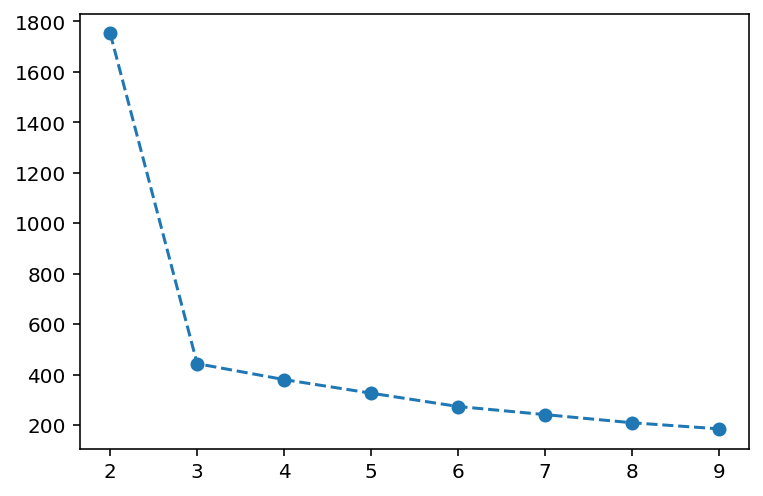

In [217]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [218]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,1751.966943
1,3,444.034966
2,4,380.883260
3,5,327.112492
4,6,274.294932
5,7,242.159439
6,8,209.913829
7,9,185.835118


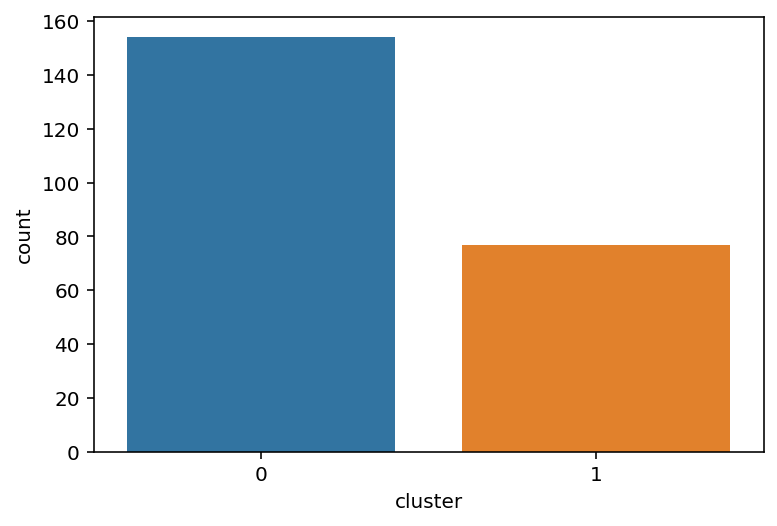

In [222]:
sns.countplot(x='cluster', data=avg_Debt_1)

In [221]:
avg_Debt_1.groupby('cluster').describe().T

cluster                     0              1
avg_debt count     154.000000      77.000000
         mean   129028.938312  135418.225974
         std     55504.453195   60090.011163
         min         0.000000   27061.000000
         25%     96679.250000   90411.000000
         50%    125007.850000  125646.100000
         75%    165346.100000  173821.400000
         max    386957.400000  309493.700000

In [224]:
avg_Debt_1

,จังหวัด,avg_debt,cluster
128,บึงกาฬ 54,0.0,0
51,บึงกาฬ 53,0.0,0
100,สมุทรสงคราม 54,9244.0,0
177,สมุทรสงคราม 55,9857.2,0
75,ยะลา 53,18901.5,0
...,...,...,...
156,นนทบุรี 55,260752.2,1
162,ชัยนาท 55,264144.0,0
154,กรุงเทพมหานคร 55,275576.8,1
5,อ่างทอง 53,309493.7,1


#การหย่าร้าง

In [228]:
divorce_1 = os.path.join(path,'divorce_1.csv')

In [229]:
divorce_1 = pd.read_csv(divorce_1)
divorce_1

,จังหวัด,couple_div
0,กรุงเทพมหานคร 53,16608.0
1,สมุทรปราการ 53,3683.0
2,นนทบุรี 53,2389.0
3,ปทุมธานี 53,2370.0
4,พระนครศรีอยุธยา 53,1981.0
...,...,...
226,ตรัง 55,742.0
227,พัทลุง 55,704.0
228,ปัตตานี 55,255.0
229,ยะลา 55,301.0


In [232]:
divorce_1.shape

(231, 2)

In [233]:
divorce_1.isnull().any()

จังหวัด       False
couple_div     True
dtype: bool

In [234]:
divorce_1[['couple_div']] = divorce_1[['couple_div']].fillna(0) 

In [235]:
divorce_1.isnull().any()

จังหวัด       False
couple_div    False
dtype: bool

In [236]:
from sklearn.cluster import KMeans

In [237]:
Xd = divorce_1[['couple_div']] #Xd คือตัวแปรของการหย่า

In [238]:
from sklearn.datasets import make_blobs

In [250]:
Xd,y=make_blobs(n_samples=231, centers=2, n_features=2, random_state=6)

In [251]:
Xd.shape 

(231, 2)

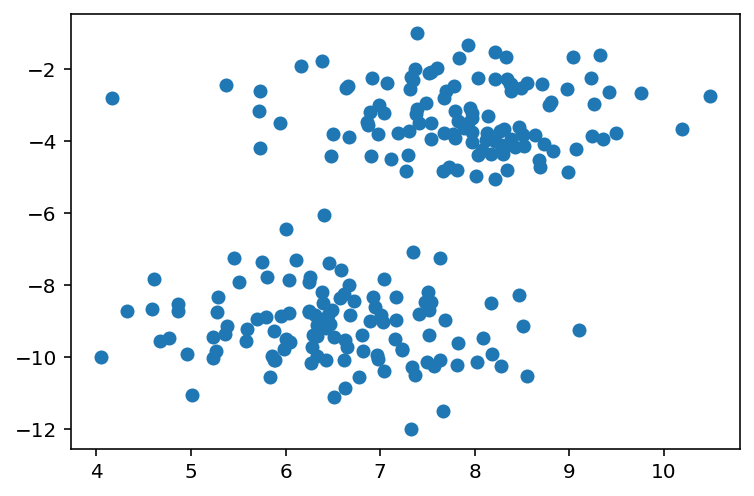

In [252]:
from matplotlib import pyplot as plt
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [253]:
from sklearn.cluster import KMeans

In [254]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [256]:
KMclust.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [257]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

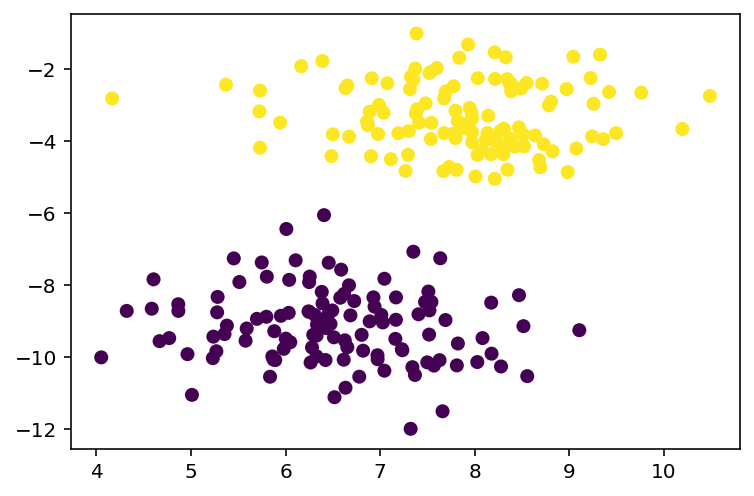

In [258]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [281]:
n_krachukd = 2 # จำนวนกระจุก
n_thamsamd = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueakd = np.random.choice(len(Xd),n_krachukd,replace=0)
X_cend = Xd[sumlueakd] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsamd):
    raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumd = raya2d.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maid = np.empty_like(X_cend) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachukd):
        if(len(Xd[klumd==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maid[j] = Xd[klumd==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maid[j] = Xd[np.random.randint(len(Xd))]
    if(np.allclose(X_cend,X_cen_maid,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cend = X_cen_maid
        break
    X_cend = X_cen_maid # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

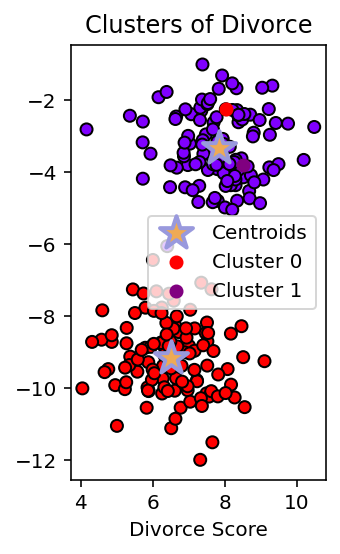

In [309]:
raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2)
zd = raya2d.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xd[:,0],Xd[:,1],c=zd,edgecolor='k',cmap='rainbow')
plt.scatter(X_cend[:,0],X_cend[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xd[0,0], Xd[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xd[1,0], Xd[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Divorce')
plt.xlabel('Divorce Score')
plt.legend()
plt.show()

In [305]:
ssed = 0
for i in range(n_krachukd):
    ssed += np.sum(raya2d[zd==i,i])
print(ssed)

444.60753115747195


In [57]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [58]:
KMclust.transform(Xd) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [59]:
KMclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [60]:
ssdd=[] #ssdd เซ็ทว่างของการหย่า
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xd)
    ssdd.append([k, m.inertia_])
ssdd

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.2639248784881],
 [5, 327.70702540620925],
 [6, 274.11757123043503],
 [7, 241.3538838811859],
 [8, 211.51217962290133],
 [9, 188.84502697841208]]

In [61]:
xyd= np.array(ssdd) #ssdd เซ็ทว่างของการหย่า
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.26392488]
 [   5.          327.70702541]
 [   6.          274.11757123]
 [   7.          241.35388388]
 [   8.          211.51217962]
 [   9.          188.84502698]]


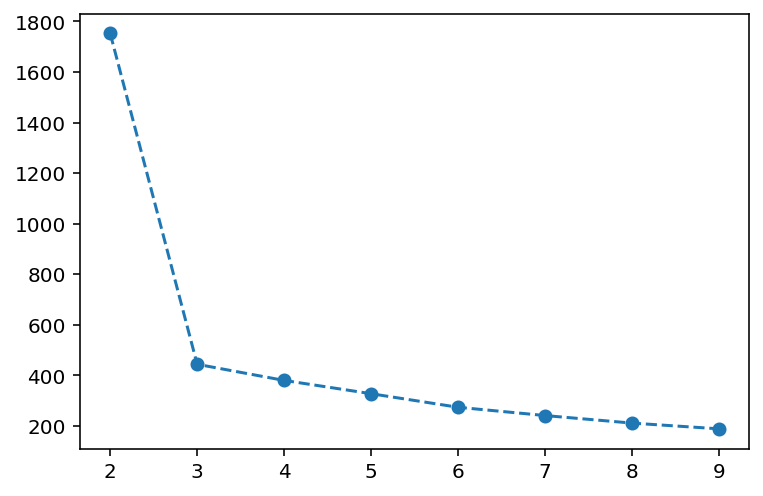

In [62]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [63]:
ddd=pd.DataFrame(ssdd, columns=['k', 'ssdd']) #ddd ตัวแปรของการหย่า
ddd

,k,ssdd
0,2,1751.966943
1,3,444.034966
2,4,380.263925
3,5,327.707025
4,6,274.117571
5,7,241.353884
6,8,211.512180
7,9,188.845027


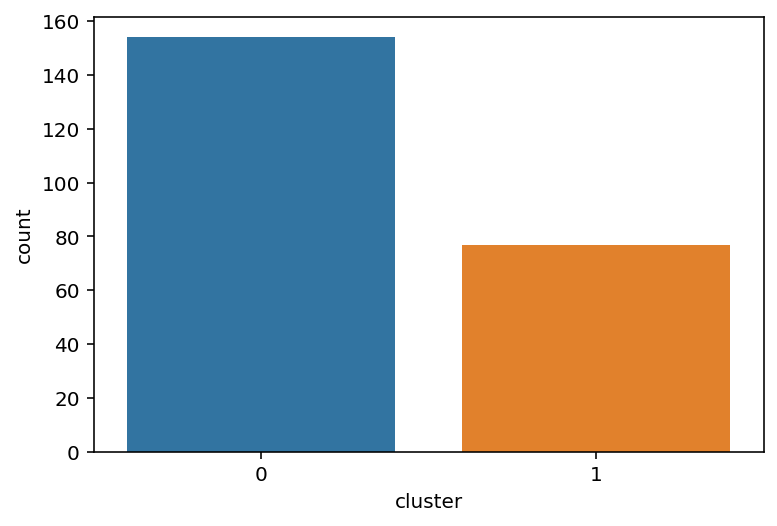

In [68]:
sns.countplot(x='cluster', data=divorce_1)

In [67]:
divorce_1.groupby('cluster').describe().T

cluster                      0            1
couple_div count    154.000000    77.000000
           mean    1560.675325  1107.480519
           std     2211.643017   814.130673
           min      134.000000     0.000000
           25%      674.250000   472.000000
           50%     1036.000000   926.000000
           75%     1647.250000  1465.000000
           max    16608.000000  4446.000000

In [69]:
divorce_1

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,0
...,...,...,...
226,ตรัง 55,742.0,1
227,พัทลุง 55,704.0,0
228,ปัตตานี 55,255.0,1
229,ยะลา 55,301.0,1


#รายได้

In [230]:
avg_Income_1 = os.path.join(path,'avg_Income_1.csv')

In [231]:
avg_Income_1 = pd.read_csv(avg_Income_1)
avg_Income_1

,จังหวัด,avg_income
0,กรุงเทพมหานคร 53,42380.0
1,สมุทรปราการ 53,23359.0
2,นนทบุรี 53,34626.0
3,ปทุมธานี 53,26686.0
4,พระนครศรีอยุธยา 53,25820.0
...,...,...
226,ตรัง 55,33269.9
227,พัทลุง 55,26169.3
228,ปัตตานี 55,20199.1
229,ยะลา 55,22483.1


In [73]:
avg_Income_1.shape

(231, 2)

In [74]:
avg_Income_1.isnull().any()

จังหวัด       False
avg_income     True
dtype: bool

In [75]:
avg_Income_1[['avg_income']] = avg_Income_1[['avg_income']].fillna(0) 

In [76]:
avg_Income_1.isnull().any()

จังหวัด       False
avg_income    False
dtype: bool

In [77]:
from sklearn.cluster import KMeans

In [78]:
Xi = avg_Income_1[['avg_income']] #Xi ตัวแปรของรายได้

In [79]:
from sklearn.datasets import make_blobs

In [80]:
Xi,y=make_blobs(n_samples=231, centers=3, n_features=2, random_state=6)

In [81]:
Xi.shape 

(231, 2)

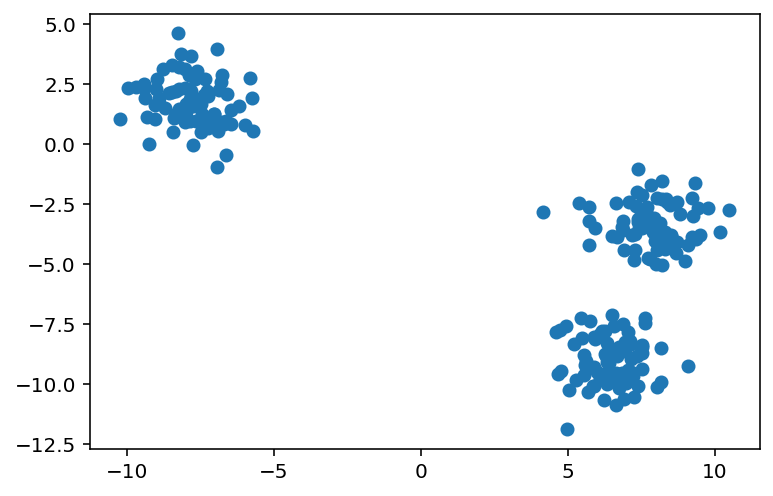

In [82]:
from matplotlib import pyplot as plt
plt.scatter(Xi[:,0],Xi[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [83]:
from sklearn.cluster import KMeans

In [84]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [85]:
KMclust.fit(Xi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
label=KMclust.predict(Xi) # predict ว่าอยู่ในกลุ่มไหน

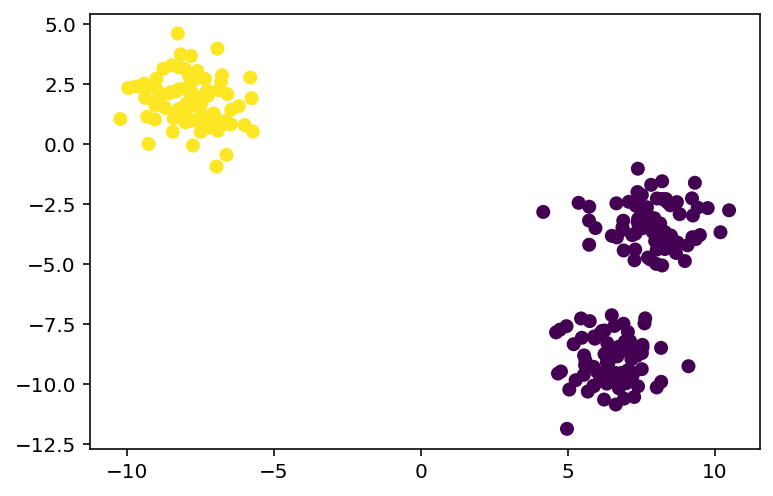

In [87]:
plt.scatter(Xi[:,0], Xi[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [280]:
n_krachuki = 2 # จำนวนกระจุก
n_thamsami = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueaki = np.random.choice(len(Xi),n_krachuki,replace=0)
X_ceni = Xi[sumlueaki] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsami):
    raya2i = ((X_ceni[None]-Xi[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumi = raya2i.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maii = np.empty_like(X_ceni) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuki):
        if(len(Xi[klumi==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maii[j] = Xi[klumi==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maii[j] = Xi[np.random.randint(len(Xi))]
    if(np.allclose(X_ceni,X_cen_maii,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_ceni = X_cen_maii
        break
    X_ceni = X_cen_maii # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

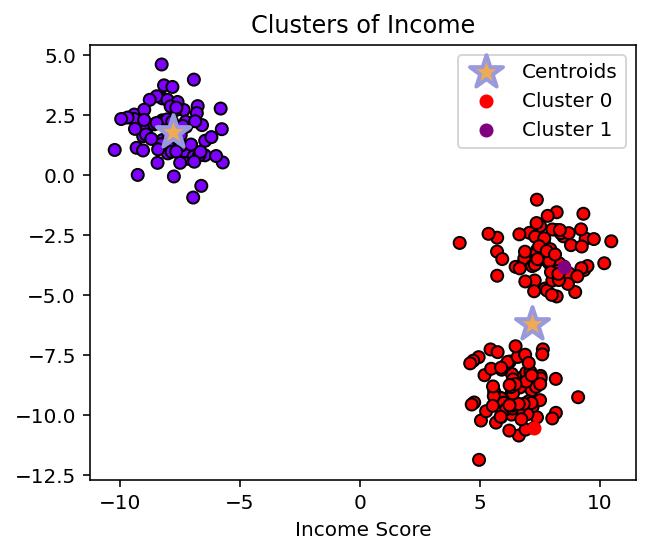

In [307]:
raya2i = ((X_ceni[None]-Xi[:,None])**2).sum(2)
zi = raya2i.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xi[:,0],Xi[:,1],c=zi,edgecolor='k',cmap='rainbow')
plt.scatter(X_ceni[:,0],X_ceni[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xi[0,0], Xi[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xi[1,0], Xi[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Income')
plt.xlabel('Income Score')
plt.legend()
plt.show()

In [304]:
ssei = 0
for i in range(n_krachuki):
    ssei += np.sum(raya2i[zi==i,i])
print(ssei)

1751.9669425508212


In [88]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [89]:
KMclust.transform(Xi) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [90]:
KMclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [91]:
ssdi=[] #เซทว่างของรายได้
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xi) #Xi ตัวแปรของรายได้
    ssdi.append([k, m.inertia_])
ssdi

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.2639248784881],
 [5, 327.11249208354513],
 [6, 274.75300198933974],
 [7, 241.48613095993358],
 [8, 210.30171116494697],
 [9, 186.93860401862088]]

In [92]:
xyi=np.array(ssdi) #xyi ตัวแปร xy ของรายได้
print(xyi)

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.26392488]
 [   5.          327.11249208]
 [   6.          274.75300199]
 [   7.          241.48613096]
 [   8.          210.30171116]
 [   9.          186.93860402]]


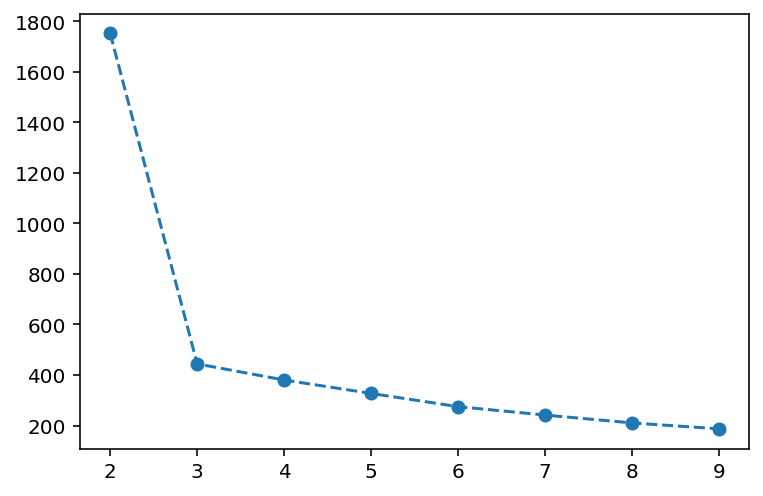

In [303]:
plt.plot(xyi[:, 0], xyi[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [94]:
ddi=pd.DataFrame(ssdi, columns=['k', 'ssdi']) 
ddi #ddi ตัวแปรของรายได้

,k,ssdi
0,2,1751.966943
1,3,444.034966
2,4,380.263925
3,5,327.112492
4,6,274.753002
5,7,241.486131
6,8,210.301711
7,9,186.938604


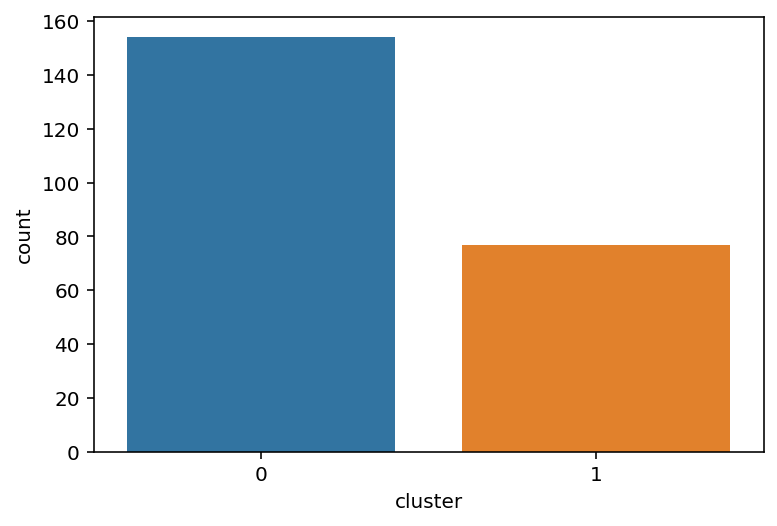

In [99]:
sns.countplot(x='cluster', data=avg_Income_1)

In [98]:
avg_Income_1.groupby('cluster').describe().T

cluster                      0             1
avg_income count    154.000000     77.000000
           mean   21081.611688  20199.318182
           std     6998.588556   6127.008737
           min        0.000000      0.000000
           25%    16704.700000  16249.300000
           50%    19881.650000  19417.800000
           75%    24943.050000  22504.500000
           max    49190.800000  36245.200000

In [100]:
avg_Income_1

,จังหวัด,avg_income,cluster
0,กรุงเทพมหานคร 53,42380.0,0
1,สมุทรปราการ 53,23359.0,0
2,นนทบุรี 53,34626.0,0
3,ปทุมธานี 53,26686.0,0
4,พระนครศรีอยุธยา 53,25820.0,0
...,...,...,...
226,ตรัง 55,33269.9,1
227,พัทลุง 55,26169.3,0
228,ปัตตานี 55,20199.1,1
229,ยะลา 55,22483.1,1


#ค่าใช้จ่าย

In [102]:
avg_Expenditure_1 = os.path.join(path,'avg_Expenditure_1.csv')

In [103]:
avg_Expenditure_1 = pd.read_csv(avg_Expenditure_1)
avg_Expenditure_1

,จังหวัด,avg_expenditure
0,กรุงเทพมหานคร 53,30334.0
1,สมุทรปราการ 53,18450.0
2,นนทบุรี 53,29487.0
3,ปทุมธานี 53,22460.0
4,พระนครศรีอยุธยา 53,20717.0
...,...,...
226,ตรัง 55,20922.3
227,พัทลุง 55,16635.7
228,ปัตตานี 55,16668.1
229,ยะลา 55,12521.7


In [104]:
avg_Expenditure_1.shape

(231, 2)

In [105]:
avg_Expenditure_1.isnull().any()

จังหวัด            False
avg_expenditure     True
dtype: bool

In [106]:
avg_Expenditure_1[['avg_expenditure']] = avg_Expenditure_1[['avg_expenditure']].fillna(0) 

In [107]:
avg_Expenditure_1.isnull().any()

จังหวัด            False
avg_expenditure    False
dtype: bool

In [108]:
from sklearn.cluster import KMeans

In [109]:
Xe = avg_Expenditure_1[['avg_expenditure']] #Xi ตัวแปรของค่าใช้จ่าย

In [110]:
from sklearn.datasets import make_blobs

In [111]:
Xe,y=make_blobs(n_samples=231, centers=4, n_features=2, random_state=6)

In [112]:
Xe.shape 

(231, 2)

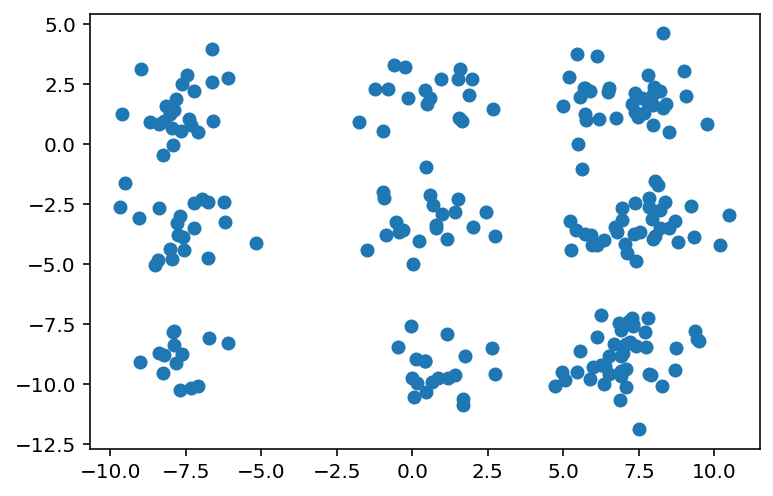

In [113]:
from matplotlib import pyplot as plt
plt.scatter(Xe[:,0],Xi[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [114]:
from sklearn.cluster import KMeans

In [115]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [116]:
KMclust.fit(Xe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
label=KMclust.predict(Xi) # predict ว่าอยู่ในกลุ่มไหน

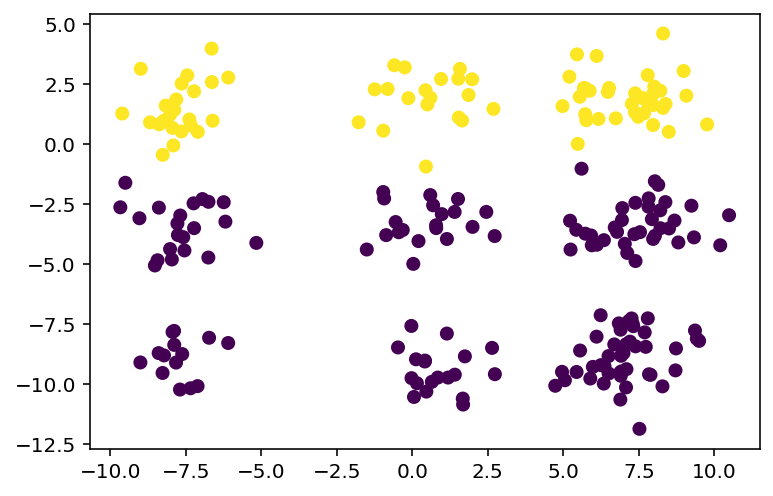

In [118]:
plt.scatter(Xe[:,0], Xi[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [296]:
n_krachuke = 2 # จำนวนกระจุก
n_thamsame = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueake = np.random.choice(len(Xe),n_krachuke,replace=0)
X_cene = Xe[sumlueake] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsame):
    raya2e = ((X_cene[None]-Xe[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klume = raya2e.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maie = np.empty_like(X_cene) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuke):
        if(len(Xe[klume==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maie[j] = Xe[klume==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maie[j] = Xe[np.random.randint(len(Xe))]
    if(np.allclose(X_cene,X_cen_maie,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cene = X_cen_maie
        break
    X_cene = X_cen_maie # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

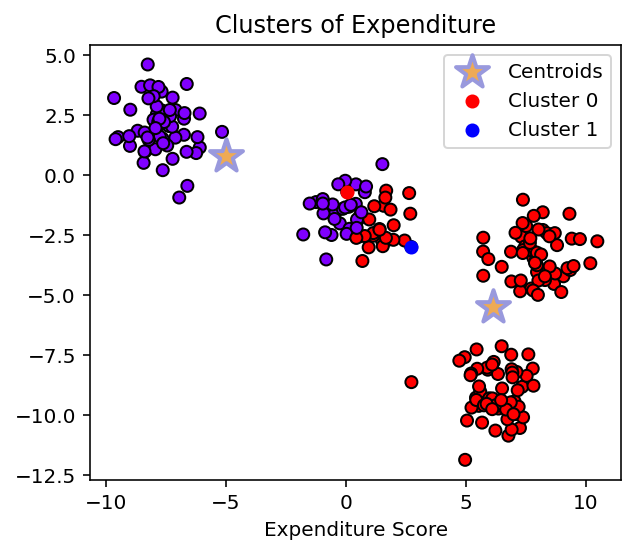

In [300]:
raya2e = ((X_cene[None]-Xe[:,None])**2).sum(2)
ze = raya2e.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xe[:,0],Xe[:,1],c=ze,edgecolor='k',cmap='rainbow')
plt.scatter(X_cene[:,0],X_cene[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xe[0,0], Xe[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xe[1,0], Xe[1,1], c = 'blue', label = 'Cluster 1')
plt.title('Clusters of Expenditure')
plt.xlabel('Expenditure Score')
plt.legend()
plt.show()

In [302]:
ssee = 0
for i in range(n_krachuke):
    ssee += np.sum(raya2e[ze==i,i])
print(ssee)

3827.936922165727


In [119]:
KMclust.cluster_centers_

array([[ 6.75152364, -5.91936113],
       [-4.12560165,  0.37783701]])

In [120]:
KMclust.transform(Xe) # the distance between each point and centroid

array([[ 8.49095676,  4.31770556],
       [ 4.97360404,  7.63892636],
       [ 3.91671774, 12.62594023],
       [17.90170884,  5.5094632 ],
       [ 4.6527848 , 15.77802464],
       [ 2.96883283, 14.71336771],
       [ 9.19817054,  3.69458891],
       [ 1.49391986, 12.03312064],
       [ 2.38708757, 14.60823379],
       [ 2.34635993, 13.15386759],
       [ 3.86154095, 12.82029252],
       [ 6.12395059,  6.44688194],
       [ 2.68986547, 12.54525894],
       [ 7.44873202,  5.14272332],
       [ 2.27742269, 13.07926073],
       [ 9.32271204,  3.25016402],
       [ 1.54118436, 12.90915607],
       [ 6.48822855,  6.10430737],
       [ 5.92482191,  7.0969365 ],
       [16.62813951,  4.29586678],
       [16.90455017,  4.33607622],
       [ 3.73372196, 15.03105507],
       [ 6.55282137,  6.01828981],
       [15.39899388,  2.94756218],
       [14.66280001,  2.11439537],
       [ 3.5280767 , 14.86276077],
       [ 2.40808921, 13.09134814],
       [ 4.84740601, 11.32431572],
       [ 3.39947272,

In [121]:
KMclust.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

In [122]:
ssde=[] #เซทว่างของรายได้
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xe) #Xi ตัวแปรของรายได้
    ssde.append([k, m.inertia_])
ssde

[[2, 3808.025083086262],
 [3, 1472.7397344707779],
 [4, 434.8621723093945],
 [5, 387.08764317414074],
 [6, 347.90136253221664],
 [7, 305.8306786100441],
 [8, 267.0189140880368],
 [9, 244.83259980602207]]

In [123]:
xye=np.array(ssde) #xyi ตัวแปร xy ของรายได้
print(xye)

[[2.00000000e+00 3.80802508e+03]
 [3.00000000e+00 1.47273973e+03]
 [4.00000000e+00 4.34862172e+02]
 [5.00000000e+00 3.87087643e+02]
 [6.00000000e+00 3.47901363e+02]
 [7.00000000e+00 3.05830679e+02]
 [8.00000000e+00 2.67018914e+02]
 [9.00000000e+00 2.44832600e+02]]


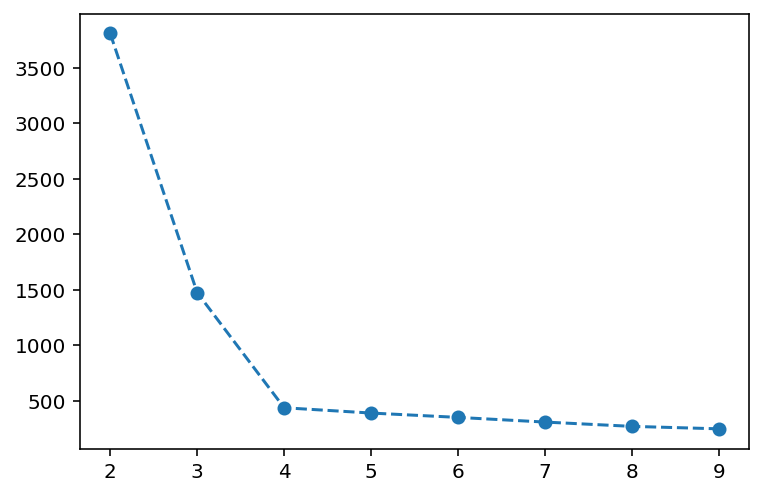

In [124]:
plt.plot(xye[:, 0], xye[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [125]:
dde=pd.DataFrame(ssde, columns=['k', 'ssde']) 
dde #ddi ตัวแปรของรายได้

,k,ssde
0,2,3808.025083
1,3,1472.739734
2,4,434.862172
3,5,387.087643
4,6,347.901363
5,7,305.830679
6,8,267.018914
7,9,244.832600


In [126]:
dde['pct_chg']=dde['ssde'].pct_change() * 100
dde

,k,ssde,pct_chg
0,2,3808.025083,NaN
1,3,1472.739734,-61.325367
2,4,434.862172,-70.472571
3,5,387.087643,-10.986131
4,6,347.901363,-10.123361
5,7,305.830679,-12.092705
6,8,267.018914,-12.690605
7,9,244.832600,-8.308892


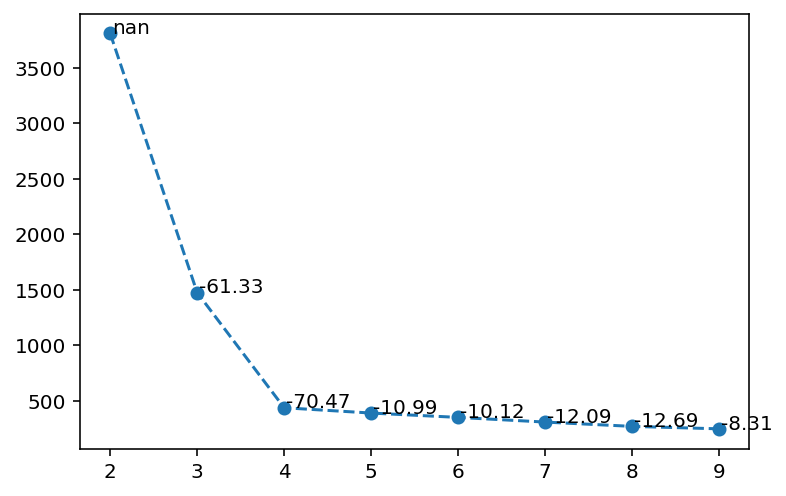

In [127]:
plt.plot(dde['k'], dde['ssde'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dde.iterrows():
    plt.text(row['k']+.02, row['ssde']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

In [128]:
avg_Expenditure_1['cluster']=KMclust.labels_
avg_Expenditure_1.head()

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,1
1,สมุทรปราการ 53,18450.0,0
2,นนทบุรี 53,29487.0,0
3,ปทุมธานี 53,22460.0,1
4,พระนครศรีอยุธยา 53,20717.0,0


In [129]:
avg_Expenditure_1.groupby('cluster').describe().T

cluster                           0             1
avg_expenditure count    126.000000    105.000000
                mean   15988.019841  16471.426667
                std     4478.505207   5143.747580
                min        0.000000      0.000000
                25%    13249.150000  13148.800000
                50%    15558.650000  15347.500000
                75%    18464.550000  18993.200000
                max    29969.200000  35023.700000

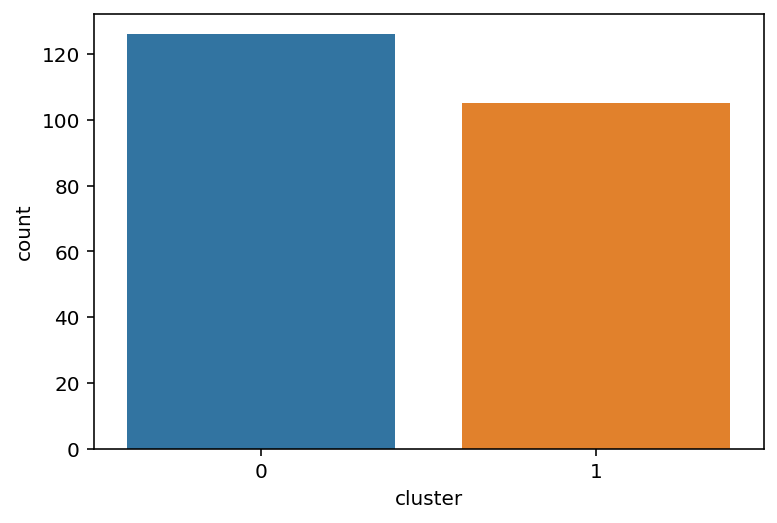

In [130]:
sns.countplot(x='cluster', data=avg_Expenditure_1)

In [131]:
avg_Expenditure_1

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,1
1,สมุทรปราการ 53,18450.0,0
2,นนทบุรี 53,29487.0,0
3,ปทุมธานี 53,22460.0,1
4,พระนครศรีอยุธยา 53,20717.0,0
...,...,...,...
226,ตรัง 55,20922.3,1
227,พัทลุง 55,16635.7,0
228,ปัตตานี 55,16668.1,0
229,ยะลา 55,12521.7,1


In [132]:
avg_Expenditure_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,avg_expenditure,cluster
1,สมุทรปราการ 53,18450.0,0
2,นนทบุรี 53,29487.0,0
4,พระนครศรีอยุธยา 53,20717.0,0
5,อ่างทอง 53,20773.0,0
7,สิงห์บุรี 53,17787.0,0
0,กรุงเทพมหานคร 53,30334.0,1
3,ปทุมธานี 53,22460.0,1
6,ลพบุรี 53,16764.0,1
13,ตราด 53,13365.0,1
15,ปราจีนบุรี 53,18472.0,1
